In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Import 

In [3]:
df = pd.read_csv(r"D:\Oasis Infobyte Intership\Retail Sales Analysis (EDA)\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.shape

(1000, 9)

In [ ]:
## As we can see there is 1000 records and 9 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.Date = pd.to_datetime(df['Date'])

In [8]:
## As we can see we change the data type of Date variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [11]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
## As we can see there is no missing values

In [13]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


<Axes: >

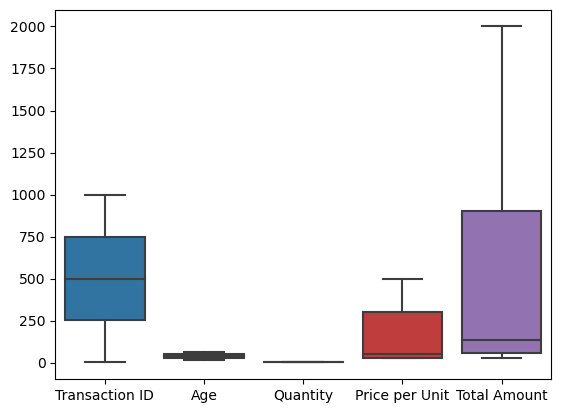

In [14]:
sns.boxplot(data = df)

In [15]:
## As we can see there is no outliers 

In [16]:
## Total Sales

total_sales= df['Total Amount'].sum()
print(f"Total Sales: ${total_sales:.2f}")

## Category Sales

category_sales = df.groupby('Product Category')['Total Amount'].sum()
print(f"\nTop3 selling categories:")
print(category_sales.sort_values(ascending = False).head(3))

## customer purchase frequency 

customer_frequency = df.groupby('Customer ID')['Transaction ID'].count()
print(f"\nAverage purchase frequency per customer: {customer_frequency.mean():.2f}")

Total Sales: $456000.00

Top3 selling categories:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Average purchase frequency per customer: 1.00


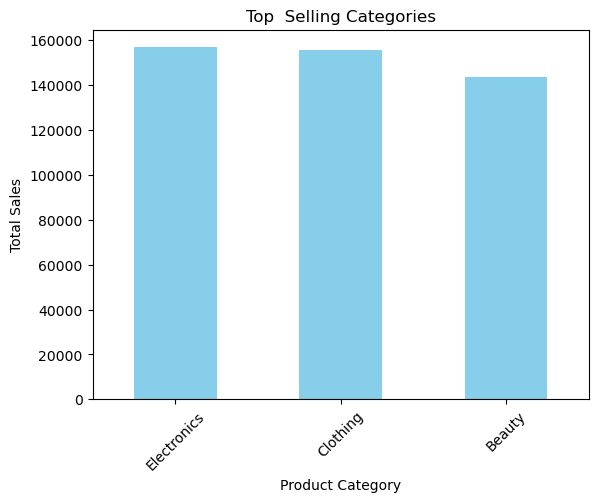

In [18]:
top_5_categories = category_sales.sort_values(ascending = False).head(5)
top_5_categories.plot(kind ='bar',color = 'skyblue')
plt.title('Top  Selling Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.show()

In [21]:
avg_purchase_value_gender = df.groupby('Gender')['Total Amount'].mean()
print(f"\nAverage Purchase Value by Gender:")
print(avg_purchase_value_gender)

purchase_Frequency_by_gender = df.groupby('Gender')['Transaction ID'].count()
print(f"\nPurchase Frequency by Gender:")
print(purchase_Frequency_by_gender)


Average Purchase Value by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

Purchase Frequency by Gender:
Gender
Female    510
Male      490
Name: Transaction ID, dtype: int64
